<a href="https://colab.research.google.com/github/ZeeMurphy/Data110/blob/main/Homework7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install joypy

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joypy import joyplot
plt.style.use('ggplot')

In [27]:
iris=sns.load_dataset('iris')

1.1 Pair Plot
Create a pair plot of all features in the Iris dataset, color-coding by species. Include an overall title for the plot.

In [28]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


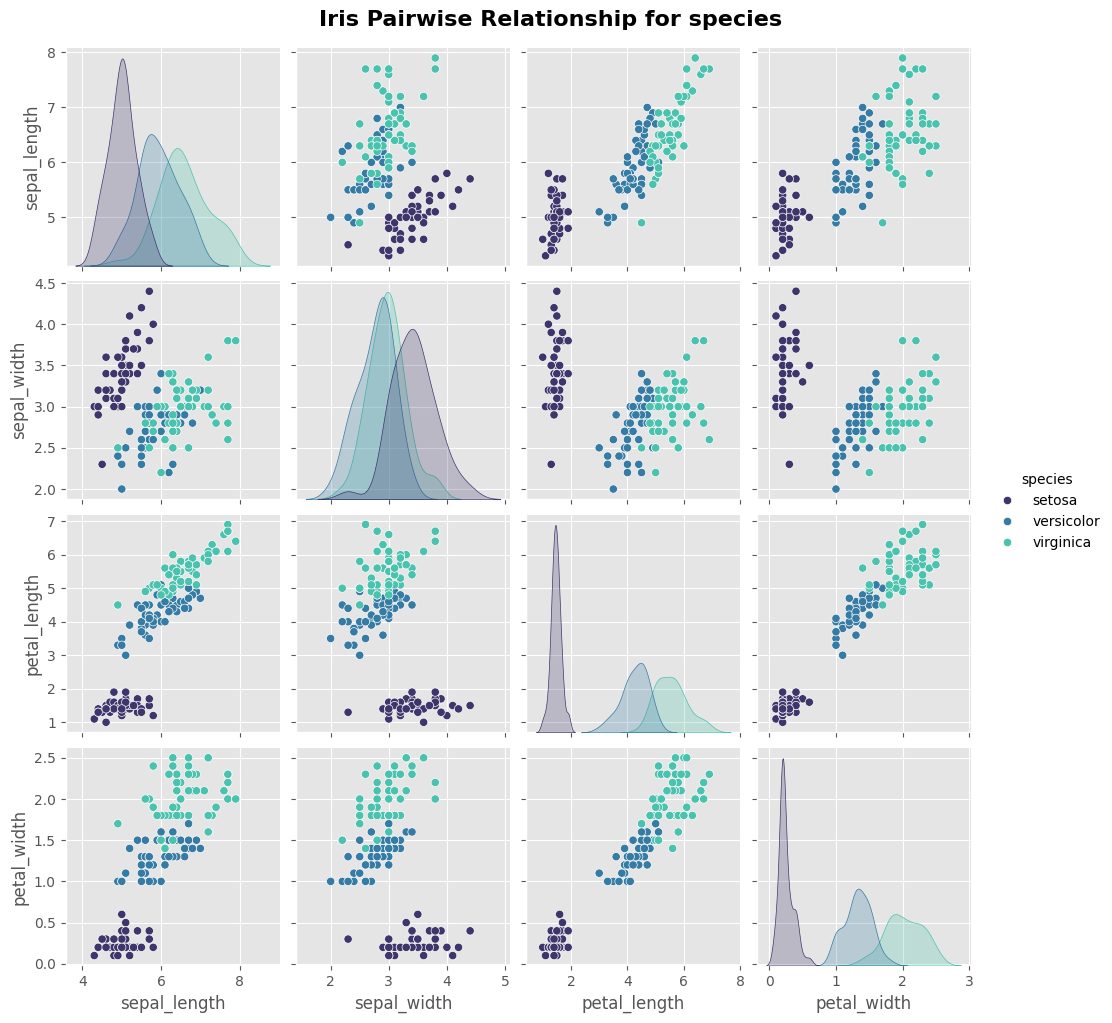

In [31]:
sns.pairplot(iris, hue='species', diag_kind='kde', palette="mako")
plt.suptitle('Iris Pairwise Relationship for species', y=1.02, fontsize=16, weight='bold')
plt.show()

1.2 Bar Plot
Create a bar plot showing the average sepal length for each iris species.

In [32]:
avg_sepal_length=iris.groupby('species')['sepal_length'].mean()
print(avg_sepal_length)

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64


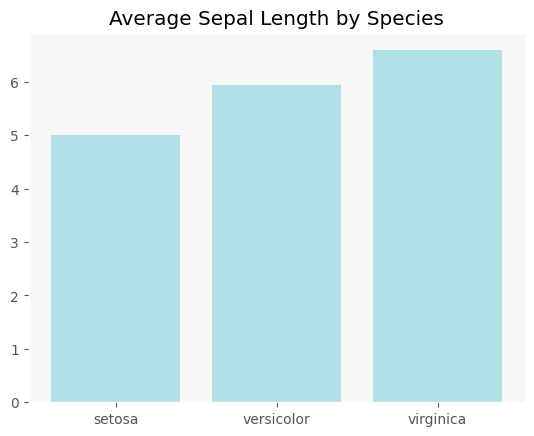

In [33]:
plt.bar(avg_sepal_length.index,avg_sepal_length.values, color='powderblue')
plt.title('Average Sepal Length by Species')
plt.gca().set_facecolor('#f7f7f7') # to make the grid background lighter
plt.grid()
plt.show()

1.3 Box Plot
Create a box plot showing the distribution of petal widths for each species.

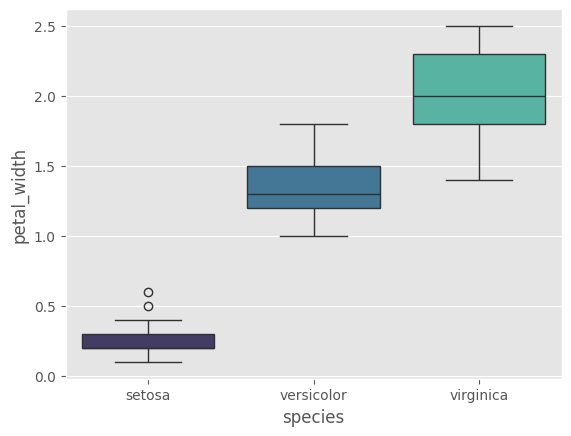

In [34]:
sns.boxplot(x='species', y='petal_width',data=iris, hue='species', palette="mako")
plt.show()

1.4 Grouped Bar Plot
Create a grouped bar plot showing the average sepal and petal lengths by species.

In [35]:
average_sepal_length=iris.groupby('species')['sepal_length'].mean()
average_petal_length=iris.groupby('species')['petal_length'].mean()

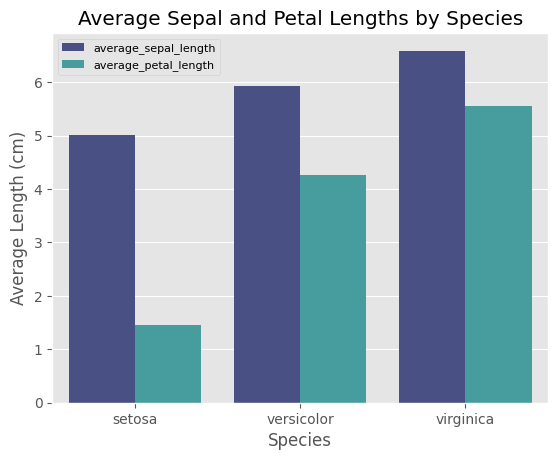

In [36]:
# Combine the results into a single DataFrame
average_lengths = pd.DataFrame({
    "species": average_sepal_length.index,
    "average_sepal_length": average_sepal_length.values,
    "average_petal_length": average_petal_length.values
})

# Reshape the data using pd.melt to make it suitable for grouped bar plotting
melted_data = pd.melt(average_lengths, id_vars="species",
                      value_vars=["average_sepal_length", "average_petal_length"],
                      var_name="Measurement", value_name="Average Length")

# Create the grouped bar plot
sns.barplot(x="species", y="Average Length", hue="Measurement", data=melted_data, palette="mako")
plt.title("Average Sepal and Petal Lengths by Species")
plt.ylabel("Average Length (cm)")
plt.legend(fontsize=8)
plt.xlabel("Species")
plt.show()


1.5 Violin Plot
Create a violin plot showing the distribution of sepal length for each species.

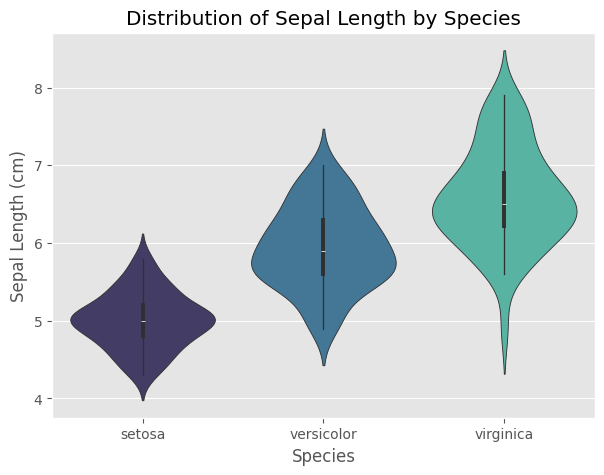

In [37]:
plt.figure(figsize=(7, 5))
sns.violinplot(x="species", y="sepal_length", hue="species", data=iris, palette="mako", legend=False)
plt.title("Distribution of Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")

plt.show()

2.1 Aggregation
a) Calculate and display the mean, minimum, and maximum values of all numerical features (sepal length, sepal width, petal length, petal width) for each species. b) Count and display the number of samples in each species.

In [38]:
aggregation_results = iris.groupby("species").agg({
    "sepal_length": ["mean", "min", "max"],
    "sepal_width": ["mean", "min", "max"],
    "petal_length": ["mean", "min", "max"],
    "petal_width": ["mean", "min", "max"]
})
print("Mean, Min, and Max values for each numerical feature by species:\n")
print(aggregation_results)

# Part (b): Count and display the number of samples in each species
sample_counts = iris["species"].value_counts()
print("\nNumber of samples in each species:\n")
print(sample_counts)

Mean, Min, and Max values for each numerical feature by species:

           sepal_length           sepal_width           petal_length       \
                   mean  min  max        mean  min  max         mean  min   
species                                                                     
setosa            5.006  4.3  5.8       3.428  2.3  4.4        1.462  1.0   
versicolor        5.936  4.9  7.0       2.770  2.0  3.4        4.260  3.0   
virginica         6.588  4.9  7.9       2.974  2.2  3.8        5.552  4.5   

                petal_width            
            max        mean  min  max  
species                                
setosa      1.9       0.246  0.1  0.6  
versicolor  5.1       1.326  1.0  1.8  
virginica   6.9       2.026  1.4  2.5  

Number of samples in each species:

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


2.2 Interpretation
Provide a brief interpretation (2-3 sentences) for each of the visualizations and the aggregated data. What insights can you draw about the different iris species based on these results?

**Pairwise Graph Interpretation**
The pairwise graph of the Iris dataset shows how the different measurements (sepal length, sepal width, petal length, and petal width) relate to each other for the three iris species. Each species is represented by a different color, making it easy to see the differences. Iris setosa stands out from the others in most measurements, indicating it has unique features. Meanwhile, Iris versicolor and Iris virginica overlap more in their measurements, suggesting they share some similar traits and can be a bit harder to tell apart.

**Average Sepal Length Interpretation**
The average sepal length for each iris species shows clear differences among them. Iris virginica has the longest average sepal length, followed by Iris versicolor, while Iris setosa has the shortest. This pattern highlights how distinct each species is, indicating that sepal length is a useful feature for identifying them. Additionally, the larger average size of Iris virginica and Iris versicolor may be linked to their specific habitats and how they adapt to their environments.

**Box Plot Interpretation**
The box plot showing petal widths for each species reveals how these widths vary among the three types of irises. Iris setosa has a small range of petal widths with a median that is much lower than the other two species. In contrast, Iris versicolor and Iris virginica have wider ranges, with Iris virginica having a higher median petal width. This plot highlights the noticeable differences in petal width across the species, suggesting that these measurements can help in identifying the different types of irises.

**Grouped Bar Plot Interpretation:** The grouped bar plot of average sepal and petal lengths reveals that Iris virginica has the highest averages for both sepal and petal length, followed by Iris versicolor, with Iris setosa showing the smallest averages. This pattern suggests that Iris virginica plants generally grow larger in these measurements, providing a visual cue to differentiate them from other species.

**Violin Plot Interpretation: **The violin plot for sepal length by species indicates that Iris virginica typically has the longest sepals, followed by Iris versicolor and then Iris setosa, which has the shortest. The plot's distribution shapes show that Iris versicolor and Iris virginica have a wider range of sepal lengths, while Iris setosa has a more compact and consistent length distribution.

**Aggregated Data Interpretation:** The summary statistics—mean, minimum, and maximum—highlight significant differences among the species. Iris setosa stands out with much smaller petal length and width values compared to the others, especially Iris virginica, which consistently has the largest measurements. The equal sample sizes for each species ensure fair comparisons, enhancing the reliability of these characteristic distinctions for identifying species based on size patterns.






